In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# de clientes de un centro comercial
# que hay en cada fila? información de cada cliente sobre sus caracteristicas y consumo
# queremos hacer varias campañas de marketing enfocadas a estos datos
# cuantas campañas hacemos?

In [5]:
X = df.drop(columns=['CustomerID'])

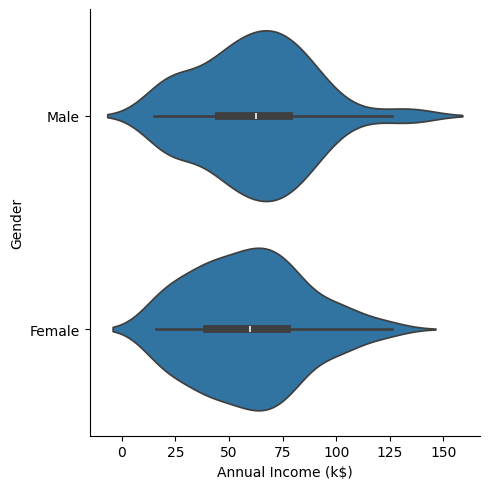

In [8]:
sns.catplot(data = X, y = "Gender", x = "Annual Income (k$)", kind = 'violin')

In [ ]:
# a nivel de distribución, los hombres ganan (income) un poco mas que las mujeres, pero no parece que sea una gran diferencia

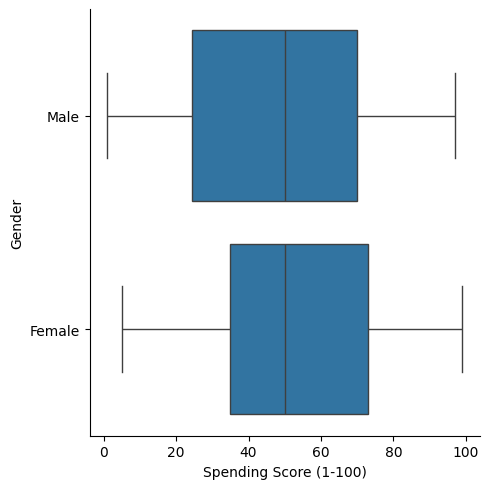

In [10]:
sns.catplot(data = X, y = "Gender", x = "Spending Score (1-100)", kind = 'box')

In [ ]:
# no hay mucha diferencia entre hombres y mujeres con respecto al Spending Score

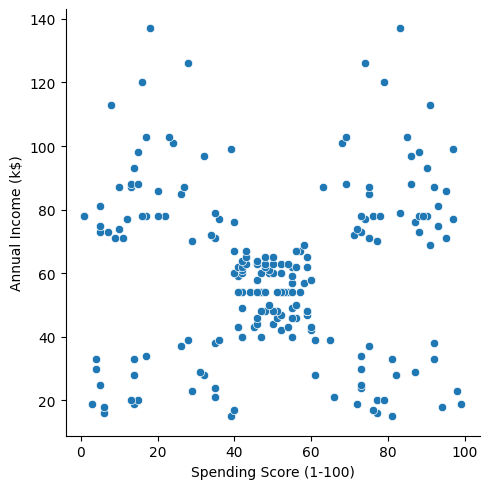

In [11]:
sns.relplot(X, x = "Spending Score (1-100)", y = "Annual Income (k$)")

In [ ]:
# aparecen 5 nuves de puntos muy bien definidas

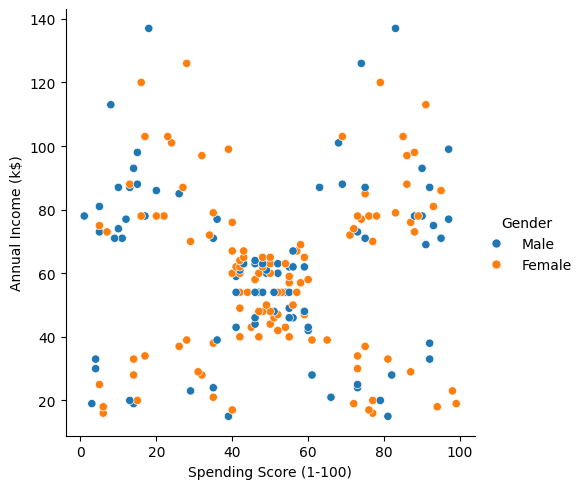

In [12]:
sns.relplot(X, x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = 'Gender')

In [ ]:
# parece que gender no discrimine los grupos, y alomejor no queremos incluir gender como variable de grupo, 
# porque no queremos hacer campañas diferenciadas por genero

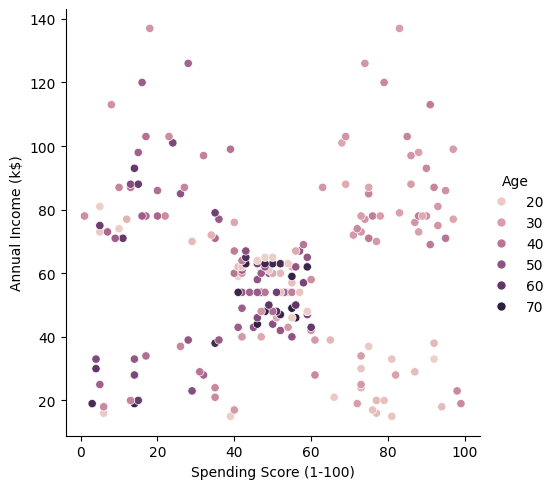

In [13]:
sns.relplot(X, x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = 'Age')

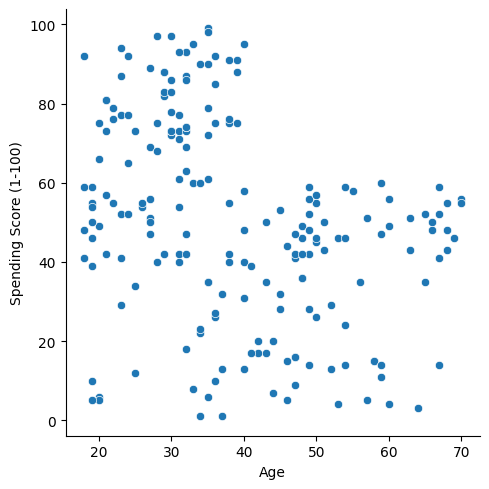

In [17]:
sns.relplot(X, x = "Age", y = "Spending Score (1-100)")

In [ ]:
# Con la exploración detectamos 5 grupos muy bien definidos
# nos interesan los outliers?
# nos sintersa dbscan?
# o kmeans es mas coherente con lo que queremos hacer y nuestros datos?

In [21]:
X = X[["Annual Income (k$)","Spending Score (1-100)"]]

In [33]:
scaler = StandardScaler() # fit y transform
dbs = DBSCAN(eps=0.4, min_samples=5)

In [34]:
proceso=make_pipeline(scaler, dbs)
proceso.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dbscan', DBSCAN(eps=0.4))])

In [35]:
df['cluster'] = dbs.labels_

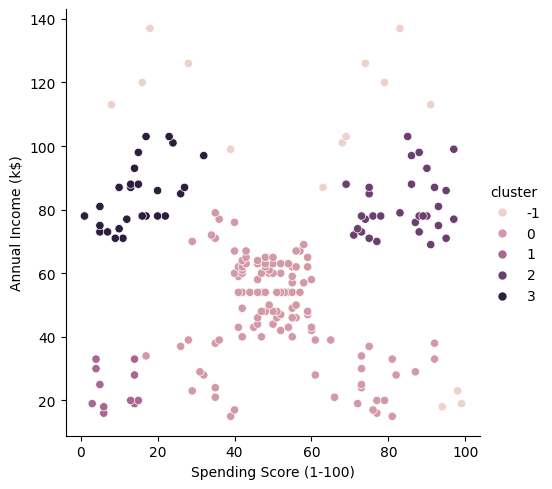

In [36]:
sns.relplot(data = df, x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = 'cluster')

# Kmeans

In [41]:
from sklearn.metrics import silhouette_score

In [44]:
sse = []
silhs = []
for k in range(2,10):
    
    # definimos el proceso
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=k)
    proceso = make_pipeline(scaler, kmeans)
    
    # aqui se ajusta todo
    proceso.fit(X)
    
    # guardamos resultados
    sse.append(kmeans.inertia_)
    sil_score = silhouette_score(scaler.transform(X), kmeans.labels_)
    silhs.append(sil_score)

C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows 

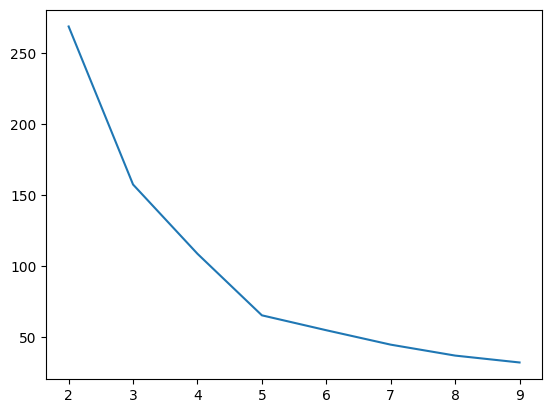

In [45]:
plt.plot(range(2,10),sse)
plt.show()

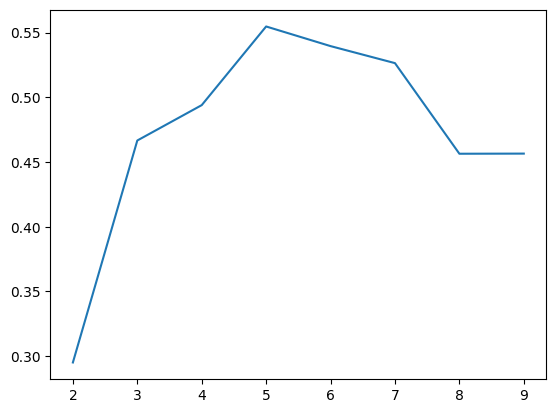

In [46]:
plt.plot(range(2,10),silhs)
plt.show()

## Hemos decidio hacer un clustering con kmeans y 5 grupos

In [47]:
 # definimos el proceso
scaler = StandardScaler()
kmeans = KMeans(n_clusters=5)
proceso = make_pipeline(scaler, kmeans)

# aqui se ajusta todo
proceso.fit(X)

df['cluster']=kmeans.labels_

C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


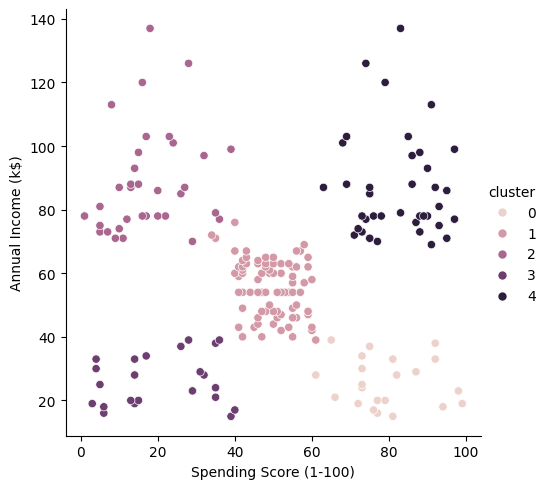

In [49]:
sns.relplot(data = df, x = "Spending Score (1-100)", y = "Annual Income (k$)", hue = 'cluster')

In [53]:
df.drop(columns=["CustomerID","Gender"]).groupby("cluster").mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


In [55]:
df.drop(columns=["CustomerID","Gender"]).groupby("cluster").std()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,5.257030,7.566731,10.504174
1,16.447822,8.988109,6.530909
2,11.341676,16.399067,9.952154
3,13.228607,7.893811,13.017167
4,3.728650,16.312485,9.364489


In [56]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,2
197,198,Male,32,126,74,4
198,199,Male,32,137,18,2
